<a href="https://colab.research.google.com/github/AndrejSinadinov/web-dev-example/blob/main/Copy_of_Welcome_to_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Uploading a file
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [ ]:
#Uploading a file
from google.colab import files
uploaded = files.upload()

Saving walkDataset.csv to walkDataset.csv


In [ ]:
#Uploading a file
from google.colab import files
uploaded = files.upload()

Saving runDataset.csv to runDataset.csv


In [ ]:
#Reading CSV files
import pandas as pd

public_df = pd.read_csv("dataset.csv")
walk_df = pd.read_csv("walkDataset.csv")
run_df = pd.read_csv("runDataset.csv")

print("Public dataset:", public_df.shape)
print("Walk dataset:", walk_df.shape)
print("Run dataset:", run_df.shape)

Public dataset: (88588, 11)
Walk dataset: (2751, 9)
Run dataset: (9014, 9)


In [ ]:
#Checking column names
print(public_df.columns)
print(walk_df.columns)
print(run_df.columns)

Index(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')
Index(['time', 'seconds_elapsed', 'accel_x', 'accel_y', 'accel_z', 'gyro_x',
       'gyro_y', 'gyro_z', 'WALK'],
      dtype='object')
Index(['time', 'seconds_elapsed', 'accel_x', 'accel_y', 'accel_z', 'gyro_x',
       'gyro_y', 'gyro_z', 'RUN'],
      dtype='object')


In [ ]:
#Renaming columns
walk_df.rename(columns={
    'accel_x': 'acceleration_x',
    'accel_y': 'acceleration_y',
    'accel_z': 'acceleration_z'
}, inplace=True)

run_df.rename(columns={
    'accel_x': 'acceleration_x',
    'accel_y': 'acceleration_y',
    'accel_z': 'acceleration_z'
}, inplace=True)

In [ ]:
#Adding lables
walk_df['activity'] = 'walk'
run_df['activity'] = 'run'

In [ ]:
#Combining into one dataset
combined_df = pd.concat([public_df, walk_df, run_df], ignore_index=True)
print("Combined dataset shape:", combined_df.shape)
print(combined_df['activity'].value_counts())

Combined dataset shape: (100353, 14)
activity
1       44365
0       44223
run      9014
walk     2751
Name: count, dtype: int64


In [ ]:
#Checking for missing values
print(combined_df.isnull().sum())
# combined_df = combined_df.dropna().reset_index(drop=True)

date               11765
time                   0
username           11765
wrist              11765
activity               0
acceleration_x         0
acceleration_y         0
acceleration_z         0
gyro_x                 0
gyro_y                 0
gyro_z                 0
seconds_elapsed    88588
WALK               97602
RUN                91339
dtype: int64


In [ ]:
#Lable encoding the target
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
combined_df['activity'] = combined_df['activity'].astype(str) # Convert to string type
combined_df['activity_enc'] = le.fit_transform(combined_df['activity'])

#Selecting features
feature_cols = ['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']

X = combined_df[feature_cols].values
y = combined_df['activity_enc'].values

#Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
print("Features shape:", X_scaled.shape)
print("Labels shape:", y.shape)
print(pd.DataFrame(X_scaled, columns=feature_cols).head())

Features shape: (100353, 6)
Labels shape: (100353,)
   acceleration_x  acceleration_y  acceleration_z    gyro_x    gyro_y  \
0        0.101864       -0.113258        0.083713 -0.033942  0.000298   
1        0.255605       -0.185188        0.027801 -0.106070 -0.007669   
2        0.167899       -0.260590        0.103386 -0.560225  0.050551   
3        0.116249       -0.119801        0.107478  0.076630 -0.300952   
4        0.183567       -0.144774        0.094437  0.035096  0.276352   

     gyro_z  
0 -1.528961  
1  0.045012  
2 -1.275137  
3 -1.531021  
4  1.263046  


In [ ]:
feature_cols = ['acceleration_x', 'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']

X = combined_df[feature_cols].values
y = combined_df['activity_enc'].values

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,       # number of trees
    max_depth=None,         # let trees expand fully
    random_state=42,
    n_jobs=-1               # use all CPU cores
)

rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

In [ ]:
#Module evaluation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Random Forest Accuracy: 0.9864979323401923

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      8845
           1       0.99      0.99      0.99      8873
           2       0.99      0.98      0.98      1803
           3       0.95      0.90      0.92       550

    accuracy                           0.99     20071
   macro avg       0.98      0.96      0.97     20071
weighted avg       0.99      0.99      0.99     20071


Confusion Matrix:
 [[8773   72    0    0]
 [ 100 8769    2    2]
 [   0   14 1765   24]
 [   3   30   24  493]]


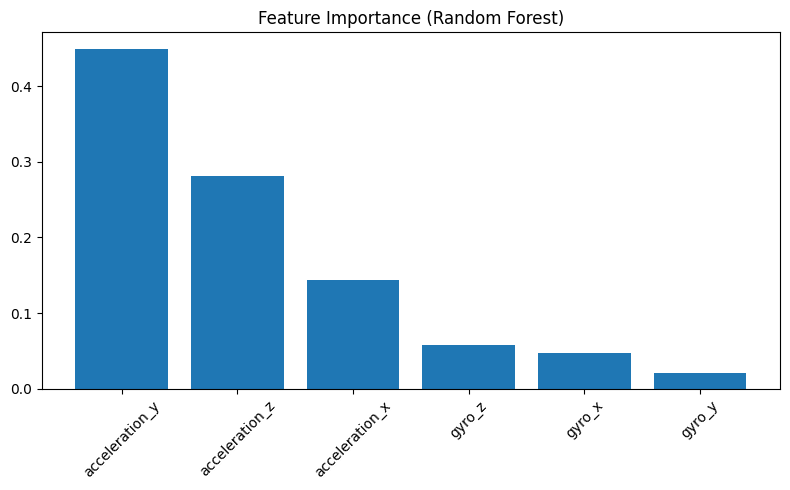

In [ ]:
#Feature importance visualization
import matplotlib.pyplot as plt
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), [feature_cols[i] for i in indices], rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
feature_cols = ['acceleration_x', 'acceleration_y', 'acceleration_z',
                'gyro_x', 'gyro_y', 'gyro_z']

X = combined_df[feature_cols].values
y = combined_df['activity_enc'].values

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Sliding window creation for deep learning
import numpy as np

def create_windows(X, y, window_size=100, step=50):
    Xs, ys = [], []
    for i in range(0, len(X) - window_size, step):
        Xs.append(X[i:i+window_size])
        ys.append(y[i+window_size-1])
    return np.array(Xs), np.array(ys)

X_win, y_win = create_windows(X_scaled, y, window_size=100, step=50)
print("Windowed shape:", X_win.shape)  # (samples, 100, 6)

Windowed shape: (2006, 100, 6)


In [ ]:
#Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_win, y_win, test_size=0.2, random_state=42, stratify=y_win
)

In [ ]:
#CNN + LSTM model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout

model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(128, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    LSTM(100),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

#Compile and train
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 98, 64)         │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 49, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 47, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 23, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 100)            │        91,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 124,049 (484.57 KB)

 Trainable params: 124,049 (484.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - accuracy: 0.8864 - loss: -809.5269 - val_accuracy: 0.8785 - val_loss: -966.5715
Epoch 2/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - accuracy: 0.8753 - loss: -907.9295 - val_accuracy: 0.8847 - val_loss: -1032.7749
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.8786 - loss: -1038.8162 - val_accuracy: 0.8847 - val_loss: -1101.0576
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8694 - loss: -1185.3464 - val_accuracy: 0.8847 - val_loss: -1165.2684
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.8835 - loss: -1139.2231 - val_accuracy: 0.8847 - val_loss: -1230.0734
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8830 - loss: -1179.1968 - val_accuracy: 0.8847 - val_loss: -1292.9270
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.8776 - loss: -1294.9255 - val_accuracy: 0.8847 - val_loss: -1362.6316
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accu

In [ ]:
#Test evaluation
loss, acc = model.evaluate(X_test, y_test)
print("CNN + LSTM Test Accuracy:", acc)

#Classification report
y_pred = (model.predict(X_test) > 0.5).astype("int32")

from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8832 - loss: -858.0642
CNN + LSTM Test Accuracy: 0.8830845952033997
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       177
           1       0.79      1.00      0.88       178
           2       0.00      0.00      0.00        36
           3       0.00      0.00      0.00        11

    accuracy                           0.88       402
   macro avg       0.45      0.50      0.47       402
weighted avg       0.79      0.88      0.83       402

Confusion Matrix:
 [[177   0   0   0]
 [  0 178   0   0]
 [  0  36   0   0]
 [  0  11   0   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


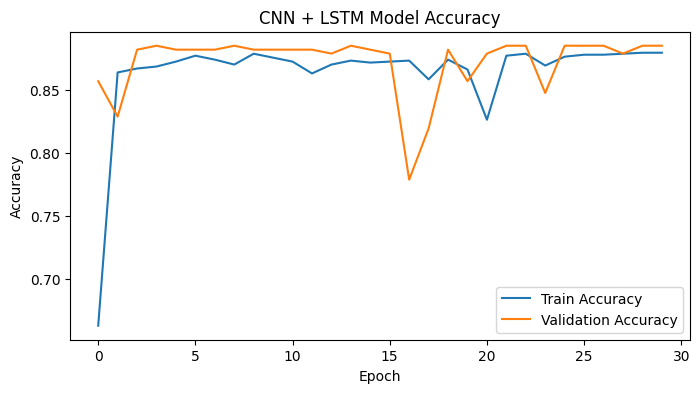

In [ ]:
#Training accuracy plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN + LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()